CODE404


# Importing libariries and visualizing data

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
# Datasets
data = pd.read_csv("dataset.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Shape and Datatype
data.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   2

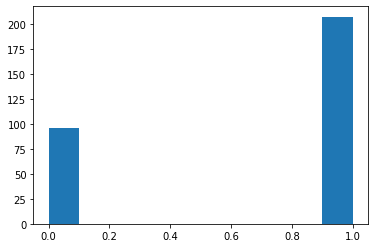

In [ ]:
plt.hist(data["sex"])
plt.show()
#Not needed.


# Spliting data into Test and Train 

In [ ]:
# Split Data
Y_train = pd.DataFrame(data = data.iloc[:, 1].values, columns = ['target'])
data = data.drop(["target"],axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size=0.2, random_state=42)
X_train.shape

(242, 13)

In [ ]:
X_train, y_train

(     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
 132   42    1   1       120   295  ...      0      0.0      2   0     2
 202   58    1   0       150   270  ...      1      0.8      2   0     3
 196   46    1   2       150   231  ...      0      3.6      1   0     2
 75    55    0   1       135   250  ...      0      1.4      1   0     2
 176   60    1   0       117   230  ...      1      1.4      2   2     3
 ..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
 188   50    1   2       140   233  ...      0      0.6      1   1     3
 71    51    1   2        94   227  ...      1      0.0      2   1     3
 106   69    1   3       160   234  ...      0      0.1      1   1     2
 270   46    1   0       120   249  ...      0      0.8      2   0     3
 102   63    0   1       140   195  ...      0      0.0      2   2     2
 
 [242 rows x 13 columns],      target
 132       1
 202       1
 196       1
 75        0
 176       1
 ..      ...
 188  

In [ ]:
X_test, y_test

(     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
 179   57    1   0       150   276  ...      1      0.6      1   1     1
 228   59    1   3       170   288  ...      0      0.2      1   0     3
 111   57    1   2       150   126  ...      0      0.2      2   1     3
 246   56    0   0       134   409  ...      1      1.9      1   2     3
 60    71    0   2       110   265  ...      0      0.0      2   1     2
 ..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
 249   69    1   2       140   254  ...      0      2.0      1   3     3
 104   50    1   2       129   196  ...      0      0.0      2   0     2
 300   68    1   0       144   193  ...      0      3.4      1   2     3
 193   60    1   0       145   282  ...      1      2.8      1   2     3
 184   50    1   0       150   243  ...      0      2.6      1   0     3
 
 [61 rows x 13 columns],      target
 179       1
 228       1
 111       1
 246       0
 60        0
 ..      ...
 249   

# Normalizing and creating a Function for comparision of models

In [ ]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train.mean()

0.40383547149448223

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
      prediction = model_name.predict(X_test)
      print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
      print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
      print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Comparing different models

In [ ]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 1.6058097964915555e-16
Mean Squared Error: 4.4302766525148926e-32
Root Mean Squared Error: 2.1048222377471436e-16
